# Dependents
***

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading the raw data and merging the datasets
***

In [315]:
mouse_data = 'mouse_drug_data.csv'
clinical_data = 'clinicaltrial_data.csv'

In [316]:
mouse_data_df = pd.read_csv(mouse_data, encoding = 'ISO-8859-1')
clinical_data_df = pd.read_csv(clinical_data, encoding = 'ISO-8859-1')

In [317]:
clinical_mouse_data_df = pd.merge(clinical_data_df, mouse_data_df, on='Mouse ID', how='outer')

# Tumor Volume Change for each treatment over time
***

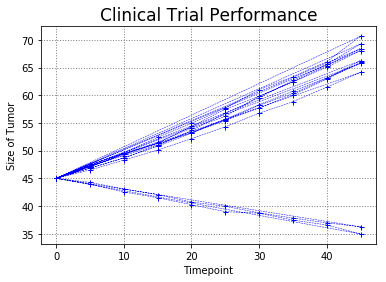

In [318]:
# I am starting this exercise by looking at the 10 drugs and their means over time. I'm not certain that graphing means
# models 'real' analysis given the highs/lows from subject to subject.
# Also showing all 10 drugs on one chart is busy.
groupby_clinical_mouse_data_df = clinical_mouse_data_df.groupby(['Drug','Timepoint']).mean()
groupby_clinical_mouse_data_df = groupby_clinical_mouse_data_df.reset_index('Timepoint')
x = groupby_clinical_mouse_data_df['Timepoint']
y = groupby_clinical_mouse_data_df['Tumor Volume (mm3)']
plt.plot(x, y, marker='+', color='blue', markersize=5, linewidth=.5, linestyle='--')
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.ylabel("Size of Tumor", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('Clinical Trial Performance', size=17)
plt.show()

In [319]:
groupby_clinical_mouse_data_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug,,,
Capomulin,0,45.000000,0.000000
Capomulin,5,44.266086,0.160000
Capomulin,10,43.084291,0.320000
Capomulin,15,42.064317,0.375000
Capomulin,20,40.716325,0.652174
Capomulin,25,39.939528,0.818182
Capomulin,30,38.769339,1.090909
Capomulin,35,37.816839,1.181818
Capomulin,40,36.958001,1.380952


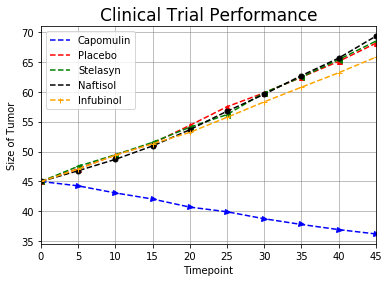

In [320]:
# Showing the means of 5 of the drugs presents a more readable chart
groupby_clinical_mouse_data_df = clinical_mouse_data_df.groupby(['Drug','Timepoint']).mean()
groupby_clinical_mouse_data_df = groupby_clinical_mouse_data_df.reset_index(['Drug', 'Timepoint'])
fig, ax = plt.subplots()
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='blue', linestyle='--', ax=ax, marker='>', label='Capomulin')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='red', linestyle='--', ax=ax, marker='^', label='Placebo')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='green', linestyle='--', ax=ax, marker='<', label='Stelasyn')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Naftisol'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='black', linestyle='--', ax=ax, marker='o', label='Naftisol')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Infubinol'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='orange', linestyle='--', ax=ax, marker='+', label='Infubinol')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("Size of Tumor", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('Clinical Trial Performance', size=17)
plt.show()

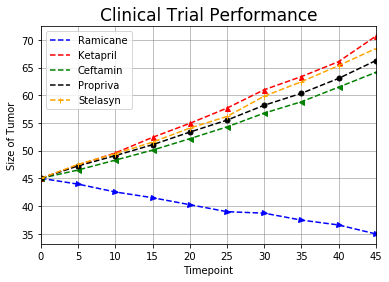

In [321]:
# Showing the means of the last 5 drugs presents the rest of the story
groupby_clinical_mouse_data_df = clinical_mouse_data_df.groupby(['Drug','Timepoint']).mean()
groupby_clinical_mouse_data_df = groupby_clinical_mouse_data_df.reset_index(['Drug', 'Timepoint'])
fig, ax = plt.subplots()
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Ramicane'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='blue', linestyle='--', ax=ax, marker='>', label='Ramicane')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Ketapril'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='red', linestyle='--', ax=ax, marker='^', label='Ketapril')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Ceftamin'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='green', linestyle='--', ax=ax, marker='<', label='Ceftamin')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Propriva'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='black', linestyle='--', ax=ax, marker='o', label='Propriva')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='orange', linestyle='--', ax=ax, marker='+', label='Stelasyn')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("Size of Tumor", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('Clinical Trial Performance', size=17)
plt.show()

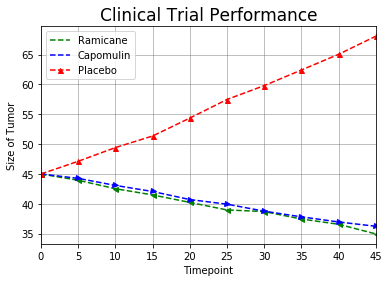

In [322]:
# Showing the performance of the 2 best drugs vs. placebo
groupby_clinical_mouse_data_df = clinical_mouse_data_df.groupby(['Drug','Timepoint']).mean()
groupby_clinical_mouse_data_df = groupby_clinical_mouse_data_df.reset_index(['Drug', 'Timepoint'])
fig, ax = plt.subplots()
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Ramicane'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='green', linestyle='--', ax=ax, marker='<', label='Ramicane')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='blue', linestyle='--', ax=ax, marker='>', label='Capomulin')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Tumor Volume (mm3)', markersize=5, color='red', linestyle='--', ax=ax, marker='^', label='Placebo')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("Size of Tumor", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('Clinical Trial Performance', size=17)
plt.show()

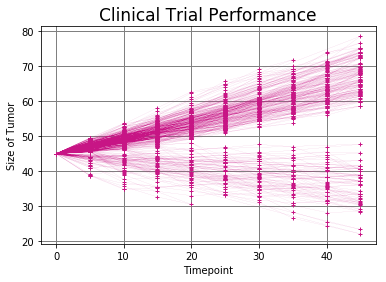

In [323]:
# 10 drugs or treatments, spread across 25 mice.  I chose to line plot all of the data.
# The 1900 individual data points don't tell a story so more analysis is needed.
x = clinical_mouse_data_df['Timepoint']
y = clinical_mouse_data_df['Tumor Volume (mm3)']
plt.plot(x, y, marker='+', color='mediumvioletred', markersize=4, linewidth=.05)
plt.grid(True, color='gray', linestyle='-', linewidth=1)
plt.ylabel("Size of Tumor", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('Clinical Trial Performance', size=17)
plt.show()

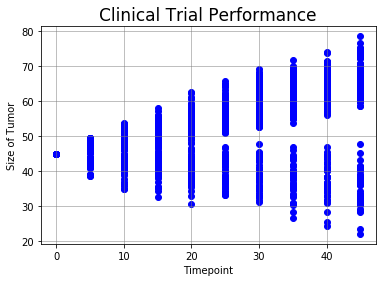

In [324]:
# 10 drugs or treatments, spread across 25 mice.  A scatter plot begins to show trends.
x = clinical_mouse_data_df['Timepoint']
y = clinical_mouse_data_df['Tumor Volume (mm3)']
plt.scatter(x, y, marker='o', color='blue')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("Size of Tumor", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('Clinical Trial Performance', size=17)
plt.show()

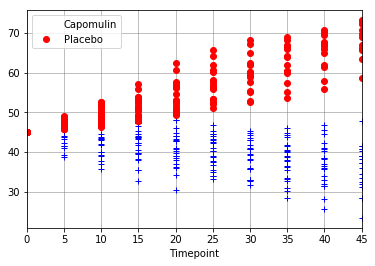

In [325]:
# Plotting 2 drugs to show the power of scatter plots and the use of subplots
fig, ax = plt.subplots()
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Tumor Volume (mm3)', color='blue', linestyle='None', ax=ax, marker='+', label='Capomulin')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Tumor Volume (mm3)', color='red', linestyle='None', ax=ax, marker='o', label='Placebo')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.show()

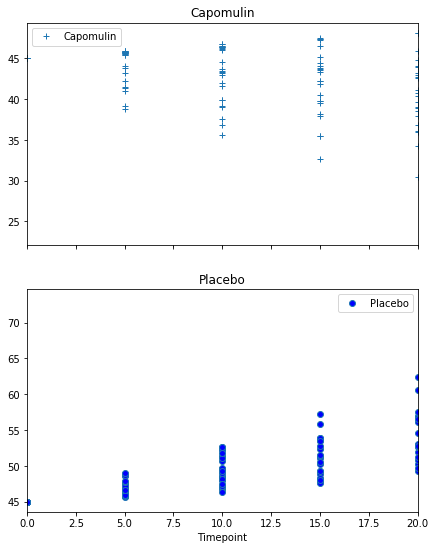

In [326]:
# Using a different subplot tool that allows for sharing axis.
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex='all', figsize=(7,9))
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='g', linestyle='None', ax=ax1, marker='+', label='Capomulin')
ax1.set_title('Capomulin')
plt.grid(True, color='green', linestyle='-', linewidth=.5)
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='b', linestyle='None', ax=ax2, marker='o', label='Placebo')
ax2.set_title('Placebo')
plt.show()

/Users/jeffmoore/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


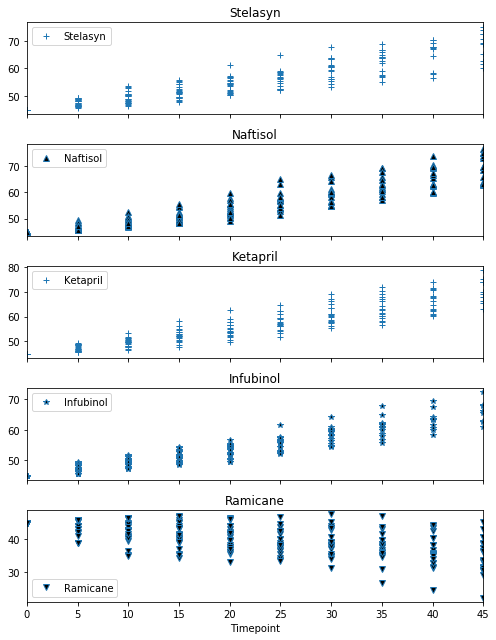

In [327]:
# Having built confidence I'm using subplots to all data for 5 drugs...allowing the viewer to see the trends
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, sharex='all', figsize=(7,9))
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax1, marker='+', label='Stelasyn')
ax1.set_title('Stelasyn')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Naftisol'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax2, marker='^', label='Naftisol')
ax2.set_title('Naftisol')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Ketapril'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax3, marker='+', label='Ketapril')
ax3.set_title('Ketapril')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Infubinol'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax4, marker='*', label='Infubinol')
ax4.set_title('Infubinol')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Ramicane'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax5, marker='v', label='Ramicane')
ax5.set_title('Ramicane')
plt.tight_layout()
plt.show()

/Users/jeffmoore/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


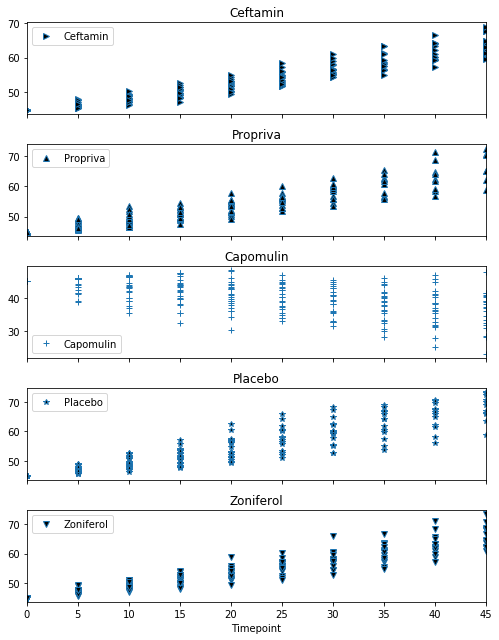

In [328]:
# Showing the remaining 5 drugs
fig, (ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=5, ncols=1, sharex='all', figsize=(7,9))
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Ceftamin'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax6, marker='>', label='Ceftamin')
ax6.set_title('Ceftamin')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Propriva'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax7, marker='^', label='Propriva')
ax7.set_title('Propriva')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax8, marker='+', label='Capomulin')
ax8.set_title('Capomulin')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax9, marker='*', label='Placebo')
ax9.set_title('Placebo')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Zoniferol'].plot(x='Timepoint', y='Tumor Volume (mm3)', markerfacecolor='black', linestyle='None', ax=ax10, marker='v', label='Zoniferol')
ax10.set_title('Zoniferol')
plt.tight_layout()
ax10.set_xlim([0, 45])
plt.show()

# Error Bars for Tumor Volume
***

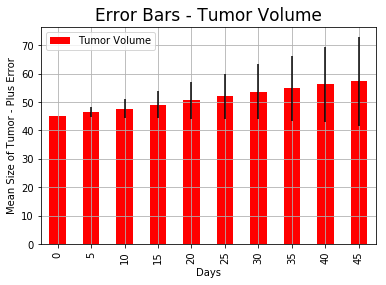

In [329]:
# Including error bars to highlight the impact of comparing means vs. using the raw data. My analysis includes
# both raw data and means analysis.  Good learning exercise.
error_data = clinical_mouse_data_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
error_data = error_data.groupby(by=['Timepoint'])
means = error_data.mean()
errors = error_data.std()
fig, ax = plt.subplots()
means.plot(yerr=errors, ax=ax, kind='bar', color='red')
ax.set_title('Error Bars - Tumor Volume', size=17)
ax.set_xlabel('Days', size=10)
ax.set_ylabel('Mean Size of Tumor - Plus Error', size=10)
ax.grid()
ax.legend(['Tumor Volume'], loc=2)
plt.show()

# Metastatic Site Analysis
***

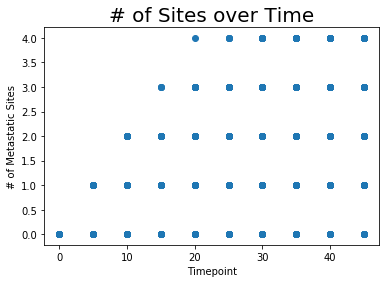

In [330]:
# Simply plotting all of the data doesn't show a trend.  Tough to perform any type of analysis.
x = clinical_mouse_data_df['Timepoint']
y = clinical_mouse_data_df['Metastatic Sites']
plt.scatter(x, y, marker='o')
plt.ylabel("# of Metastatic Sites", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('# of Sites over Time', size=20)
plt.show()

/Users/jeffmoore/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


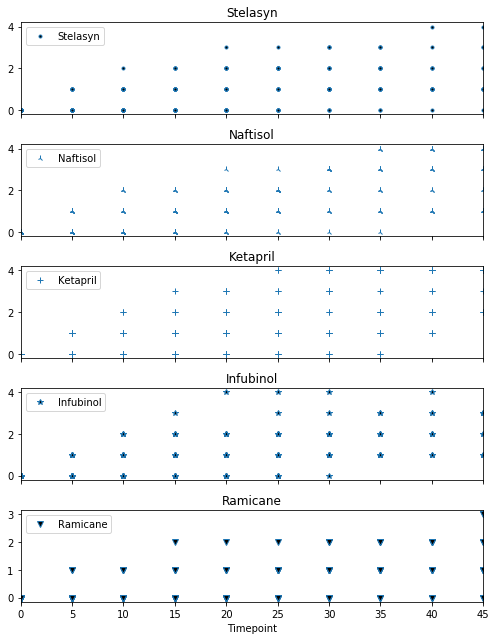

In [331]:
# Using subplots allows us to perform analysis and spot trends.  I chose to plot 5 drugs at one time.
fig, (ax10, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, sharex='all', figsize=(7,9))
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax10, marker='.', label='Stelasyn')
ax10.set_title('Stelasyn')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Naftisol'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax2, marker='2', label='Naftisol')
ax2.set_title('Naftisol')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Ketapril'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax3, marker='+', label='Ketapril')
ax3.set_title('Ketapril')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Infubinol'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax4, marker='*', label='Infubinol')
ax4.set_title('Infubinol')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Ramicane'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax5, marker='v', label='Ramicane')
ax5.set_title('Ramicane')
plt.tight_layout()
plt.show()

/Users/jeffmoore/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


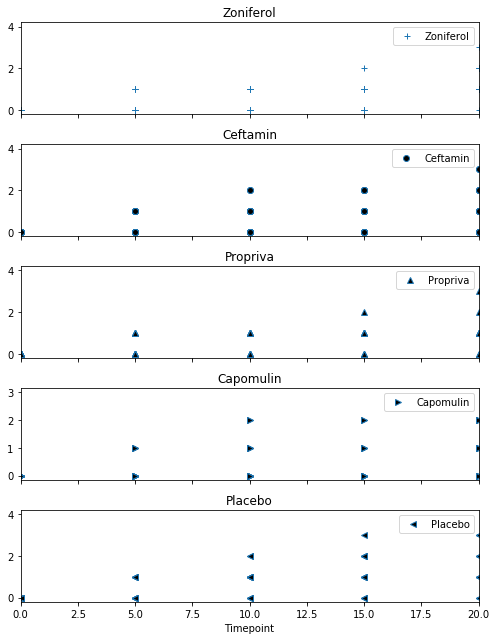

In [332]:
fig, (ax1, ax6, ax7, ax8, ax9) = plt.subplots(nrows=5, ncols=1, sharex='all', figsize=(7,9))
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Zoniferol'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax1, marker='+', label='Zoniferol')
ax1.set_title('Zoniferol')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Ceftamin'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax6, marker='o', label='Ceftamin')
ax6.set_title('Ceftamin')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Propriva'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax7, marker='^', label='Propriva')
ax7.set_title('Propriva')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax8, marker='>', label='Capomulin')
ax8.set_title('Capomulin')
clinical_mouse_data_df[clinical_mouse_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Metastatic Sites', markerfacecolor='black', linestyle='None', ax=ax9, marker='<', label='Placebo')
ax9.set_title('Placebo')
plt.tight_layout()
plt.show()

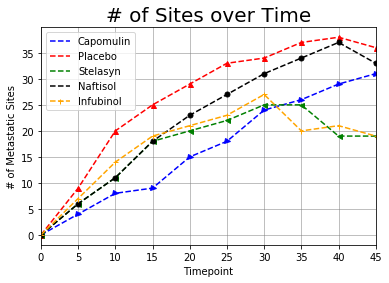

In [333]:
# Lastly I chose to sum the points by Timepoint and plot that.  Really telling insights.
groupby_clinical_mouse_data_df = clinical_mouse_data_df.groupby(['Drug','Timepoint']).sum()
groupby_clinical_mouse_data_df = groupby_clinical_mouse_data_df.reset_index(['Drug', 'Timepoint'])
fig, ax = plt.subplots()
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='blue', linestyle='--', ax=ax, marker='>', label='Capomulin')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='red', linestyle='--', ax=ax, marker='^', label='Placebo')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='green', linestyle='--', ax=ax, marker='<', label='Stelasyn')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Naftisol'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='black', linestyle='--', ax=ax, marker='o', label='Naftisol')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Infubinol'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='orange', linestyle='--', ax=ax, marker='+', label='Infubinol')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("# of Metastatic Sites", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('# of Sites over Time', size=20)
plt.show()

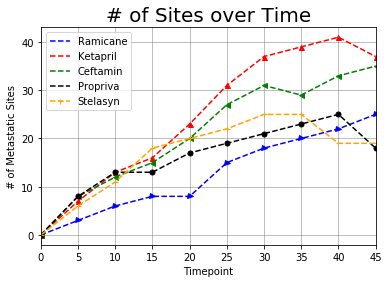

In [334]:
fig, ax = plt.subplots()
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Ramicane'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='blue', linestyle='--', ax=ax, marker='>', label='Ramicane')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Ketapril'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='red', linestyle='--', ax=ax, marker='^', label='Ketapril')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Ceftamin'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='green', linestyle='--', ax=ax, marker='<', label='Ceftamin')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Propriva'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='black', linestyle='--', ax=ax, marker='o', label='Propriva')
groupby_clinical_mouse_data_df[groupby_clinical_mouse_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Metastatic Sites', markersize=5, color='orange', linestyle='--', ax=ax, marker='+', label='Stelasyn')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("# of Metastatic Sites", size=10)
plt.xlabel("Timepoint", size=10)
plt.title('# of Sites over Time', size=20)
plt.show()

# Graph of Mouse Survival Rate over the 45 Days
***

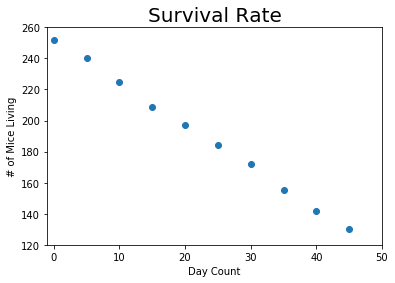

In [335]:
# Looking at value counts is an easy way to see the death rate or survival rate of the mice at each day regardless of
# the drug/treatment
death_rate = clinical_mouse_data_df['Timepoint'].value_counts()
death_rate = pd.DataFrame(data=death_rate)
death_rate = death_rate.rename(columns={'Timepoint':'Rate'})
x = np.arange(0,50,5)
plt.scatter(x, y=death_rate['Rate'])
plt.ylabel("# of Mice Living", size=10)
plt.xlabel("Day Count", size=10)
plt.title('Survival Rate', size=20)
plt.xlim(-1,50)
plt.ylim(120,260)
plt.show()

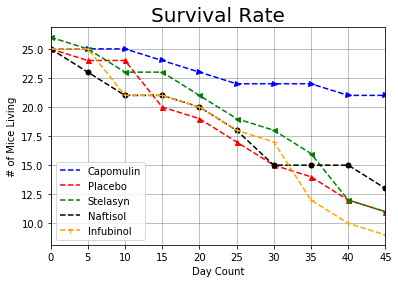

In [336]:
# Graphing of survival rates by drug over the 45 day period
death_data_df = clinical_mouse_data_df.groupby(['Drug', 'Timepoint']).count()
death_data_df = death_data_df.reset_index(['Drug', 'Timepoint'])
fig, ax = plt.subplots()
death_data_df[death_data_df['Drug'] == 'Capomulin'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='blue', linestyle='--', ax=ax, marker='>', label='Capomulin')
death_data_df[death_data_df['Drug'] == 'Placebo'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='red', linestyle='--', ax=ax, marker='^', label='Placebo')
death_data_df[death_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='green', linestyle='--', ax=ax, marker='<', label='Stelasyn')
death_data_df[death_data_df['Drug'] == 'Naftisol'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='black', linestyle='--', ax=ax, marker='o', label='Naftisol')
death_data_df[death_data_df['Drug'] == 'Infubinol'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='orange', linestyle='--', ax=ax, marker='+', label='Infubinol')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("# of Mice Living", size=10)
plt.xlabel("Day Count", size=10)
plt.title('Survival Rate', size=20)
plt.show()

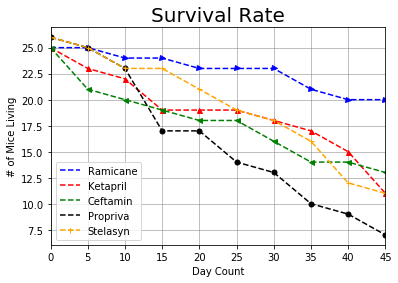

In [337]:
fig, ax = plt.subplots()
death_data_df[death_data_df['Drug'] == 'Ramicane'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='blue', linestyle='--', ax=ax, marker='>', label='Ramicane')
death_data_df[death_data_df['Drug'] == 'Ketapril'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='red', linestyle='--', ax=ax, marker='^', label='Ketapril')
death_data_df[death_data_df['Drug'] == 'Ceftamin'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='green', linestyle='--', ax=ax, marker='<', label='Ceftamin')
death_data_df[death_data_df['Drug'] == 'Propriva'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='black', linestyle='--', ax=ax, marker='o', label='Propriva')
death_data_df[death_data_df['Drug'] == 'Stelasyn'].plot(x='Timepoint', y='Mouse ID', markersize=5, color='orange', linestyle='--', ax=ax, marker='+', label='Stelasyn')
plt.grid(True, color='gray', linestyle='-', linewidth=.5)
plt.ylabel("# of Mice Living", size=10)
plt.xlabel("Day Count", size=10)
plt.title('Survival Rate', size=20)
plt.show()

In [338]:
death_data_df

,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,25,25,25
1,Capomulin,5,25,25,25
2,Capomulin,10,25,25,25
3,Capomulin,15,24,24,24
4,Capomulin,20,23,23,23
5,Capomulin,25,22,22,22
6,Capomulin,30,22,22,22
7,Capomulin,35,22,22,22
8,Capomulin,40,21,21,21
9,Capomulin,45,21,21,21


# Graphing Percent Change of Tumor Size (Bar Chart)
***

In [339]:
# Using a neat percent change dataframe method to calculate the change from Day 1 to Day 45 for each drug
vol_change = clinical_mouse_data_df.groupby(by=('Drug', 'Timepoint')).sum()
vol_change = vol_change.reset_index(level=['Drug','Timepoint'])
percent_change = []
for name in drug_names:
    percent_value = vol_change[vol_change['Drug'] == name]['Tumor Volume (mm3)'].pct_change(periods=9)
    hold = percent_value.sum()*-100
    percent_change.append(hold)

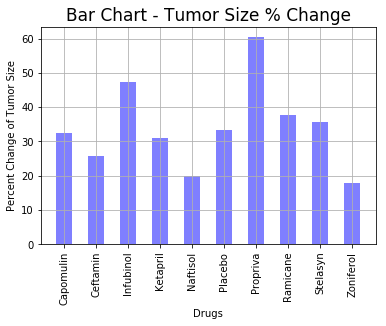

In [340]:
drug_names = vol_change['Drug'].unique()
y_pos = np.arange(0,10,1)
plt.bar(y_pos, percent_change, align='center', alpha=0.5, color='blue', width=.5)
plt.xticks(y_pos, drug_names)
plt.ylabel('Percent Change of Tumor Size', size=10)
plt.xlabel('Drugs', size=10)
plt.title('Bar Chart - Tumor Size % Change', size=17)
plt.xticks(rotation=90)
plt.grid()
plt.show()